In [95]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import pydae.svg_tools as svgt
%config InlineBackend.figure_format = 'svg'
import pydae.grid_tools as gt


In [96]:
from pydae import ssa
from gform_3bus import gform_3bus_class

In [134]:
syst = gform_3bus_class()



syst.initialize([{ 'P_B2':-200e3,'K_delta_B1':1e-6,'K_delta_B3':1e-6,
                  "K_wq_B1":0.0,"K_ep_B1":0.0,"K_wp_B1":0.01,"K_eq_B1":0.1,
                  "K_wq_B3":0.0,"K_ep_B3":0.0,"K_wp_B3":0.01,"K_eq_B3":0.1,
                  "T_omega_B1": 10e-3,"T_omega_B3": 10e-3,
                  "T_e_B1": 10e-3,"T_e_B3": 10e-3,
                 }
                ],1)
gt.change_line(syst,'B1','B2',X_km=0.04,R_km=0.1,km=1.5)
gt.change_line(syst,'B2','B3',X_km=0.04,R_km=0.1,km=0.5)
syst.initialize([{ 'P_B2':-200e3}],1)
print(syst.get_value('V_B2'))
ssa.eval_A(syst)
ssa.damp_report(syst)

0.9224296615711663


,Real,Imag,Freq.,Damp
Mode 1,-160.338238,0.0,0.0,1.0
Mode 2,-0.000001,0.0,0.0,1.0
Mode 3,-37.039864,0.0,0.0,1.0
Mode 4,-59.111312,0.0,0.0,1.0
Mode 5,-99.314401,0.0,0.0,1.0
Mode 6,-100.000000,0.0,0.0,1.0


In [135]:
syst.report_y()

V_B1  =  1.02
theta_B1 = -0.09
V_B2  =  0.92
theta_B2 = -0.14
V_B3  =  0.96
theta_B3 = -0.13
omega_coi =  0.99
i_d_B1 =  0.00
i_q_B1 =  1.06
p_g_B1_1 =  1.07
q_g_B1_1 = -0.11
i_d_B3 =  0.30
i_q_B3 =  1.09
p_g_B3_1 =  1.07
q_g_B3_1 =  0.17


In [136]:
ssa.participation(syst).abs().round(2)

,Mode 1,Mode 2,Mode 3,Mode 4,Mode 5,Mode 6
delta_B1,0.01,0.5,1.38,0.89,0.00,0.0
omega_B1,0.03,0.0,0.87,1.38,0.04,0.5
e_B1,0.47,0.0,0.07,0.10,0.50,0.0
delta_B3,0.01,0.5,1.38,0.89,0.00,0.0
omega_B3,0.02,0.0,0.75,1.20,0.03,0.5
e_B3,0.46,0.0,0.07,0.10,0.50,0.0


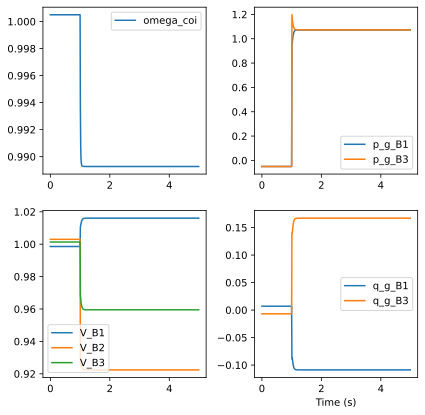

In [137]:
 
syst.simulate([{'t_end':1.0, 'P_B2':10e3},
               {'t_end':5.0, 'P_B2':-200.0e3}],1)

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(6, 6), dpi=20)

axes[0,0].plot(syst.T, syst.get_values('omega_coi'), label=f'omega_coi')
axes[1,0].plot(syst.T, syst.get_values('V_B1'), label=f'V_B1')
axes[1,0].plot(syst.T, syst.get_values('V_B2'), label=f'V_B2')
axes[1,0].plot(syst.T, syst.get_values('V_B3'), label=f'V_B3')
#axes[1].plot(syst.T, syst.get_values('q'), label=f'q')
#axes[2].plot(syst.T, syst.get_values('head'), label=f'head')
axes[0,1].plot(syst.T, syst.get_values('p_g_B1_1'), label=f'p_g_B1')
axes[0,1].plot(syst.T, syst.get_values('p_g_B3_1'), label=f'p_g_B3')
axes[1,1].plot(syst.T, syst.get_values('q_g_B1_1'), label=f'q_g_B1')
axes[1,1].plot(syst.T, syst.get_values('q_g_B3_1'), label=f'q_g_B3')
#axes.set_ylabel('$\\theta (º)$')
axes[1,1].set_xlabel('Time (s)')
for ax in axes.flatten():
    ax.legend()
fig.tight_layout()